In [1]:
from vikor_v_analysis import VikorVAnalysis
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import rankdata
import numpy as np

Let's start by computing all data for the experiment, then we'll have all descriptions.

In [2]:
experiment = VikorVAnalysis('wind_farms_data.csv')
experiment.run_experiment_v()
experiment.run_experiment_weights()
experiment.run_experiment_ahp()

# Towards Robust Sustainable Solutions Using VIKOR

## Results

### Dataset and Baseline

In the empirical study, a set of 7 potential offshore wind farm locations were investigated.

> TUTAJ OPIS TYCH LOKALIZACJI na podstawie EXCELA.

The locations were evaluated based on 30 criteria, which can be clustered into five groups: Location (L1-L6), Market (M7-M9), Social Benefits (S10-S17), Economic Benefits (E18-E27) and Financial Costs (F28-F30). The detailed description of the criteria is presented in **TUTAJ**. 

The criterial performance of each location is presented in the table below. The values are presented in their original units and are not normalized.

In [3]:
experiment.data

,L1,L2,L3,L4,L5,L6,M7,M8,M9,S10,...,E21,E22,E23,E24,E25,E26,E27,F28,F29,F30
A1,720,122,37.0,60.0,32.0,41,4,5.901639,2882390.40,1.455826e+06,...,16.560,89.124786,1782.495720,150.441696,0,3,0,8912.478600,300.883392,159.840
A2,720,119,22.0,65.0,32.0,39,3,6.050420,2882390.40,1.455826e+06,...,16.560,89.124786,1782.495720,150.441696,0,3,0,8912.478600,300.883392,159.840
A3,1498,190,40.0,-40.0,35.0,50,4,7.884211,5996973.36,3.028927e+06,...,34.454,185.429069,3708.581373,313.002306,0,2,2,18542.906870,626.004613,332.556
A4,1045,130,25.0,-25.0,45.0,60,3,8.038462,4183469.40,2.112970e+06,...,24.035,129.354724,2587.094483,218.349406,0,2,2,12935.472410,436.698812,231.990
A5,350,41,50.0,-50.0,42.0,42,3,8.536585,1401162.00,7.076933e+05,...,8.050,43.324549,866.490975,73.131380,0,1,0,4332.454875,146.262760,77.700
A6,1140,131,22.5,35.0,39.0,45,3,8.702290,4563784.80,2.305058e+06,...,26.220,141.114245,2822.284890,238.199352,1,2,2,14111.424450,476.398704,253.080
A7,400,91,23.0,28.5,46.5,60,4,4.395604,1601328.00,8.087924e+05,...,9.200,49.513770,990.275400,83.578720,0,1,0,4951.377000,167.157440,88.800


The cost/benefit impact of each criterion is presented here:

In [4]:
experiment.impacts

L1     1.0
L2     1.0
L3    -1.0
L4    -1.0
L5    -1.0
L6    -1.0
M7    -1.0
M8     1.0
M9     1.0
S10    1.0
S11    1.0
S12    1.0
S13    1.0
S14    1.0
S15    1.0
S16    1.0
S17    1.0
E18    1.0
E19    1.0
E20    1.0
E21    1.0
E22    1.0
E23    1.0
E24    1.0
E25    1.0
E26    1.0
E27    1.0
F28   -1.0
F29   -1.0
F30   -1.0
Name: Type (profit/cost), dtype: float64

Before proceeding with any robustness experiments, a baseline ranking of the locations should be established. In order to produce a ranking using the VIKOR method, each criterion needs to be assigned the preference weight. The weights can be obtained using expert judgment, however, in order to ascertain objectivity of the research, in this study a set of 4 objective weighting methods was used: equal weights, CRITIC, Entropy Weighting and Gini. The weights are presented **TUTAJ** and are charted **TUTAJ**.

In [5]:
pd.DataFrame(experiment.v_weights_scenarios, index=experiment.data.columns)

,eq,crit,ent,gini
L1,0.033333,0.017860,0.020578,0.026280
L2,0.033333,0.016923,0.013351,0.019198
L3,0.033333,0.058060,0.009810,0.017816
L4,0.033333,0.063396,-0.001759,0.242031
L5,0.033333,0.068597,0.001980,0.008285
L6,0.033333,0.054253,0.002723,0.009510
M7,0.033333,0.068469,0.001994,0.007351
M8,0.033333,0.036517,0.004656,0.011984
M9,0.033333,0.017860,0.020578,0.026280
S10,0.033333,0.017860,0.020578,0.026280


<Figure size 640x480 with 0 Axes>

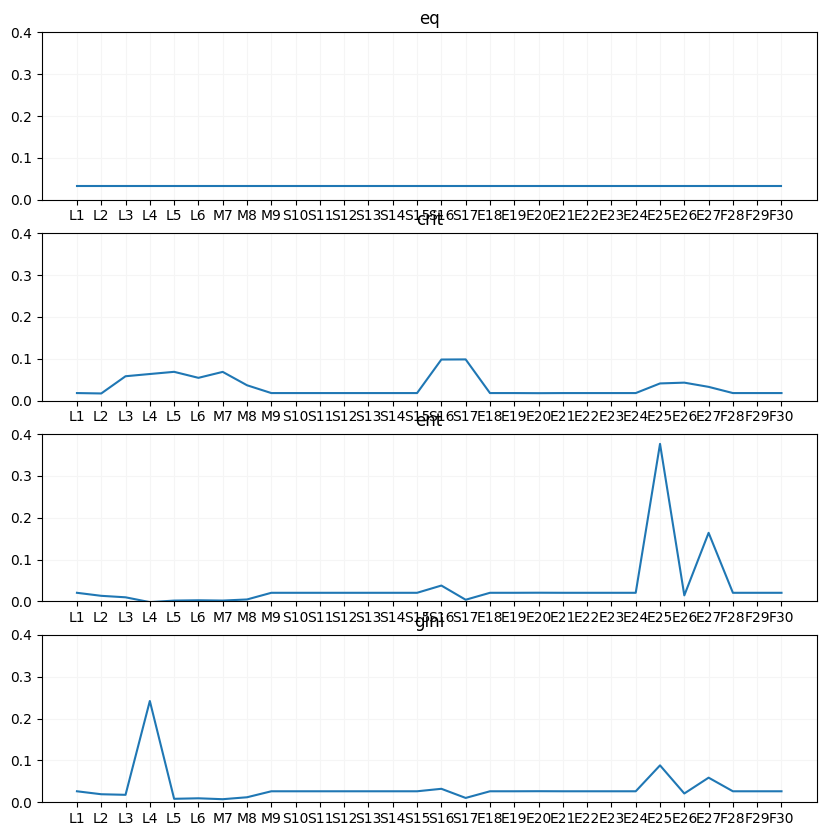

In [6]:
experiment.draw_v_weights_plots(None, ylim=[0,0.4])
plt.show()

The `v` parameter in VIKOR method allows to choose between multiple approaches to obtain the final ranking. If the value is 1, then the strategy of maximum group utility is used, therefore the solution closest to ideal solution is ranked best. However, if value is 0, then the veto strategy is used. This means that the solution with worst value of the worst criterion is penalized in the ranking. Any value between 0 and 1, allows to balance between these two strategies. In case of value 0.5, a consensus between best group utility value and vetoing worst cases is achieved.

In many research papers the value of `v` is set to `0.5` [**dodac referencje**], and this is the value which we will use in this study for benchmarking. 

The `Qi` scores for four rankings obtained in such manner are presented **TUTAJ**.

In [7]:
comparisons_v = [
    experiment.comparisons_v['eq'].to_dataframe(),
    experiment.comparisons_v['crit'].to_dataframe(),
    experiment.comparisons_v['ent'].to_dataframe(),
    experiment.comparisons_v['gini'].to_dataframe(),
]
comparisons_v_df = pd.concat(comparisons_v)
comparisons_v_05 = comparisons_v_df[comparisons_v_df['evaluator'] == 'v_0.5']
comparisons_v_05 = comparisons_v_05.drop(columns=['evaluator', 'decision_problem'])
comparisons_v_05.set_index('weights_set', inplace=True)
comparisons_v_05

,A1,A2,A3,A4,A5,A6,A7
weights_set,,,,,,,
eq,0.273180,0.220163,0.016667,0.179978,0.416958,0.084777,0.516667
crit,0.252917,0.066330,0.628333,0.715227,0.208906,0.590595,1.000000
ent,0.919145,0.914076,0.715818,0.785671,1.000000,0.000000,0.991000
gini,0.890648,0.918167,0.000000,0.153104,0.336836,0.446148,0.750297


In [8]:
comparisons_v_05_ranks = pd.DataFrame(rankdata(comparisons_v_05, axis=1, method='min'), index=comparisons_v_05.index, columns=comparisons_v_05.columns)
comparisons_v_05_ranks

,A1,A2,A3,A4,A5,A6,A7
weights_set,,,,,,,
eq,5,4,1,3,6,2,7
crit,3,1,5,6,2,4,7
ent,5,4,2,3,7,1,6
gini,6,7,1,2,3,4,5


For ease of comparison, the `Qi` scores can be visualized in a bar chart **TUTAJ**. Note that the Y axis is inverted, so the higher the bar, the better the ranking.

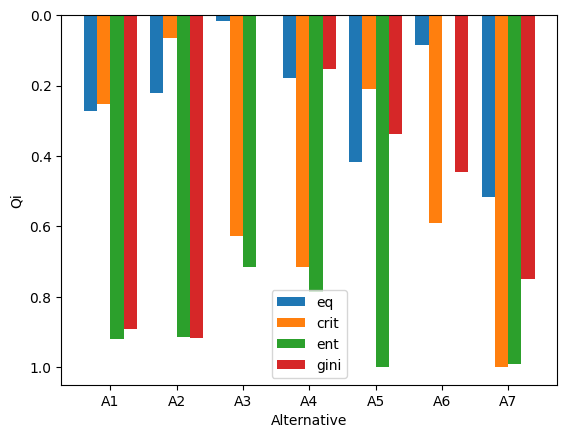

In [9]:
x_num = np.arange(len(comparisons_v_05.columns))
bar_width = 1 / (comparisons_v_05.index.size + 1)

fig, ax = plt.subplots()
i = 0
for index, row in comparisons_v_05.iterrows():
    ax.bar(x_num + (bar_width * i), row, label=index, width=bar_width)
    i += 1

ax.set_xlabel('Alternative')
ax.set_ylabel('Qi')
ax.legend()
ax.set_xticks(x_num + bar_width * (i - 1) / 2)
ax.set_xticklabels(comparisons_v_05.columns)
fig.gca().invert_yaxis()
plt.show()

During the comparative analysis of the obtained baseline rankings, the correlation matrix presented **TUTAJ** might also be helpful.

In [10]:
from comparator.utils import plot_correlations_heatmap
# plot_correlations_heatmap(comparisons_v_05.T.corr(), figure_size=(5,3), title="Correlation between baseline rankings", x_label=None, y_label=None)


And for ranks:

In [11]:
# plot_correlations_heatmap(comparisons_v_05_ranks.T.corr(), figure_size=(5,3), title="Correlation between baseline rankings", x_label=None, y_label=None)

The analysis of the aforementioned tables and charts allows to observe that each ranking indicates different alternative as the best one. However, based on the correlation matrices, the results produced by equal-weights  and entropy-weights are most correlated to each other. Gini is also quite similar to these two, but CRITIC is the most different. CRITIC is not correlated to the EQ and ENT rankings, and there is notifiable negative correlation between CRITIC and Gini.

### Maximum Group Utility vs Consensus vs Veto Robustness


The rankings presented in section **BASELINES** were produced using a fixed `v=0.5` value. In the first robustness experiment, the value of `v` was varied between 0 and 1, in `0.2` steps in order to observe how the rankings change. The results of such sensitivity analysis are presented on the charts **TUTAJ**.  

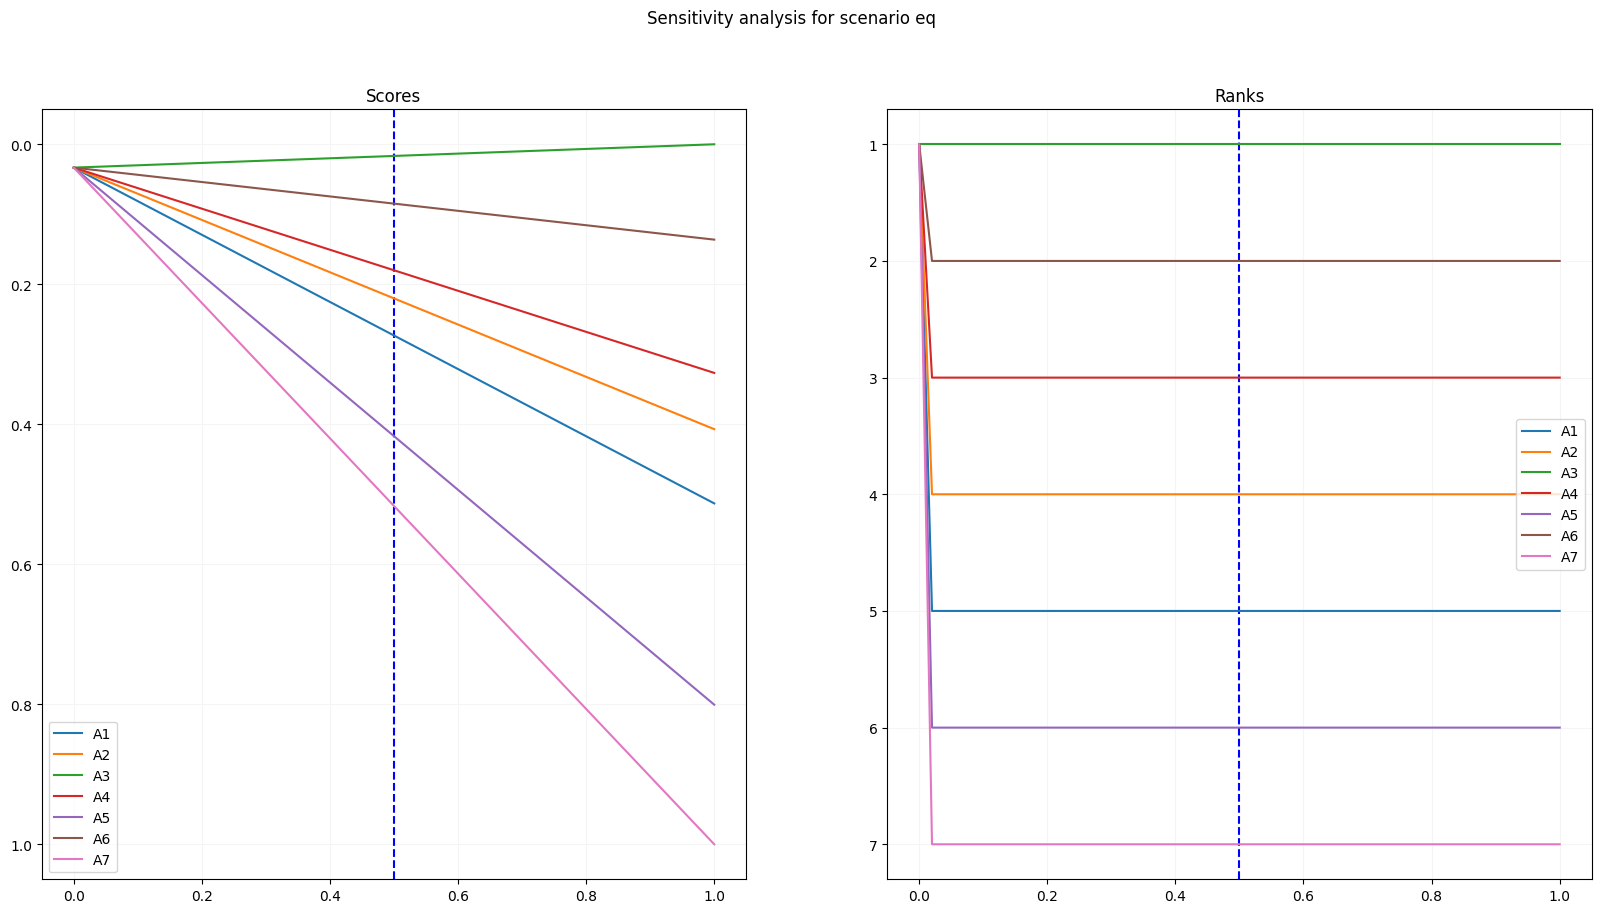

<Figure size 640x480 with 0 Axes>

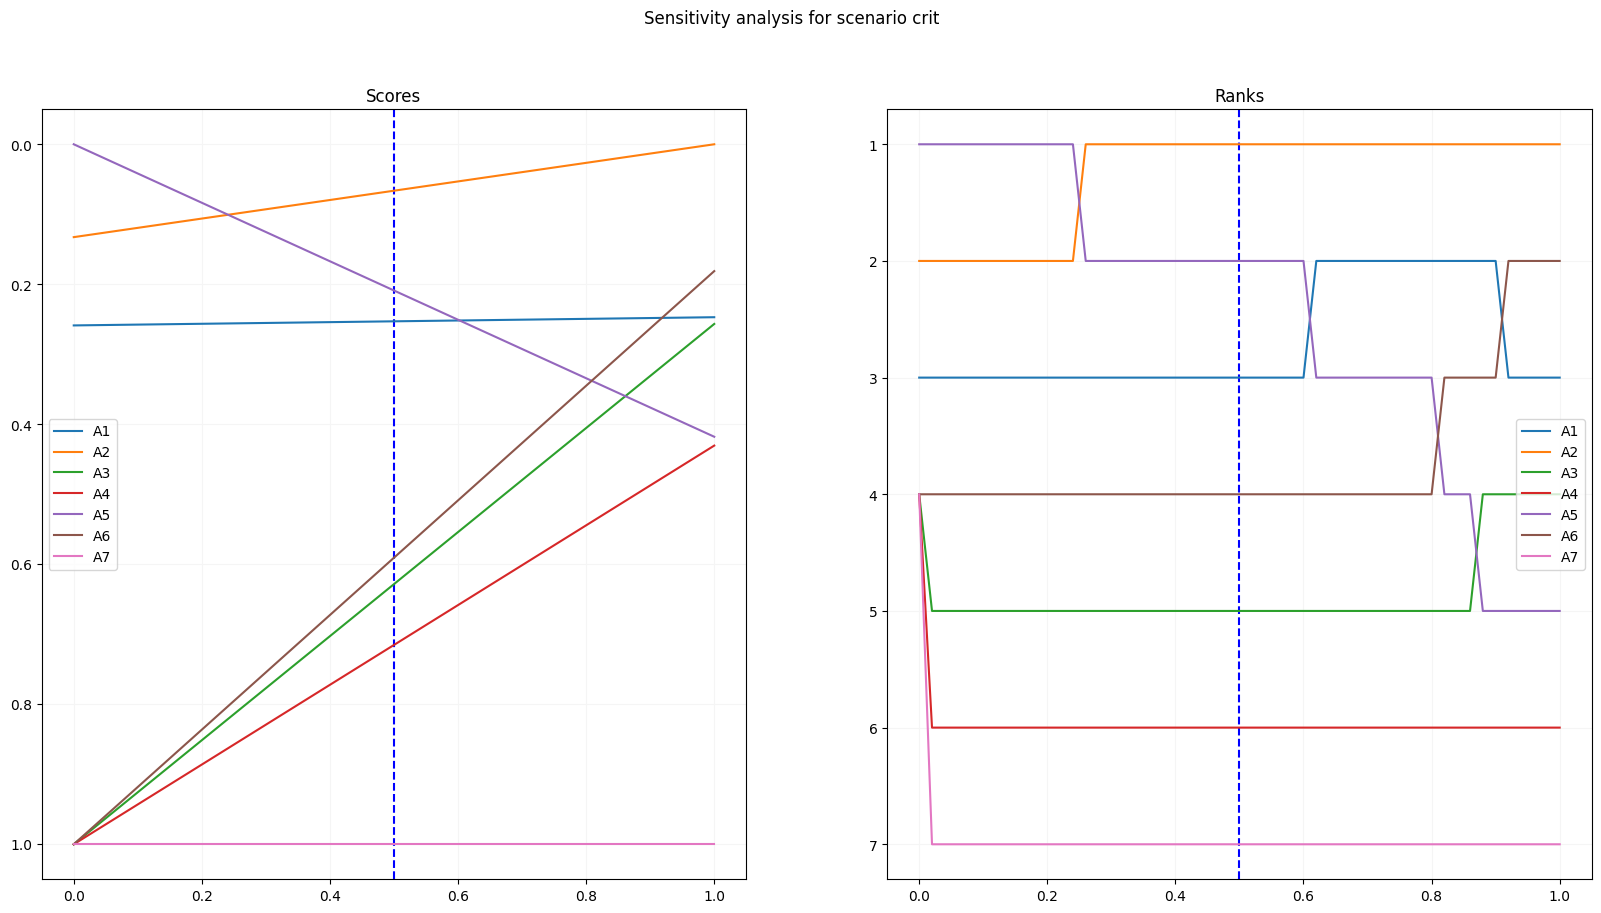

<Figure size 640x480 with 0 Axes>

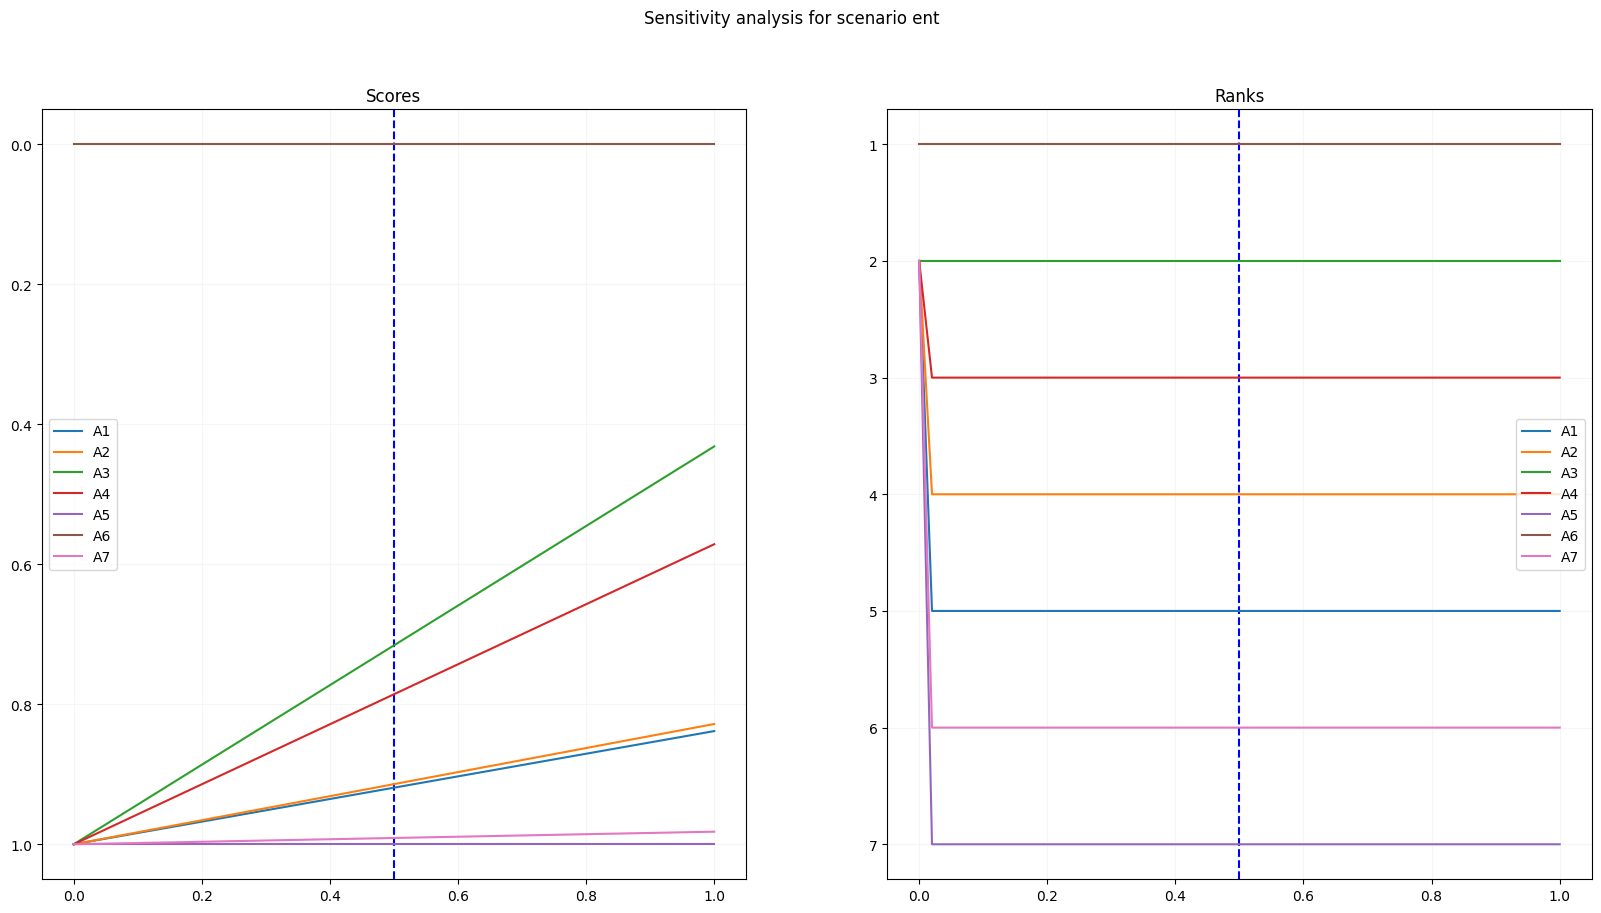

<Figure size 640x480 with 0 Axes>

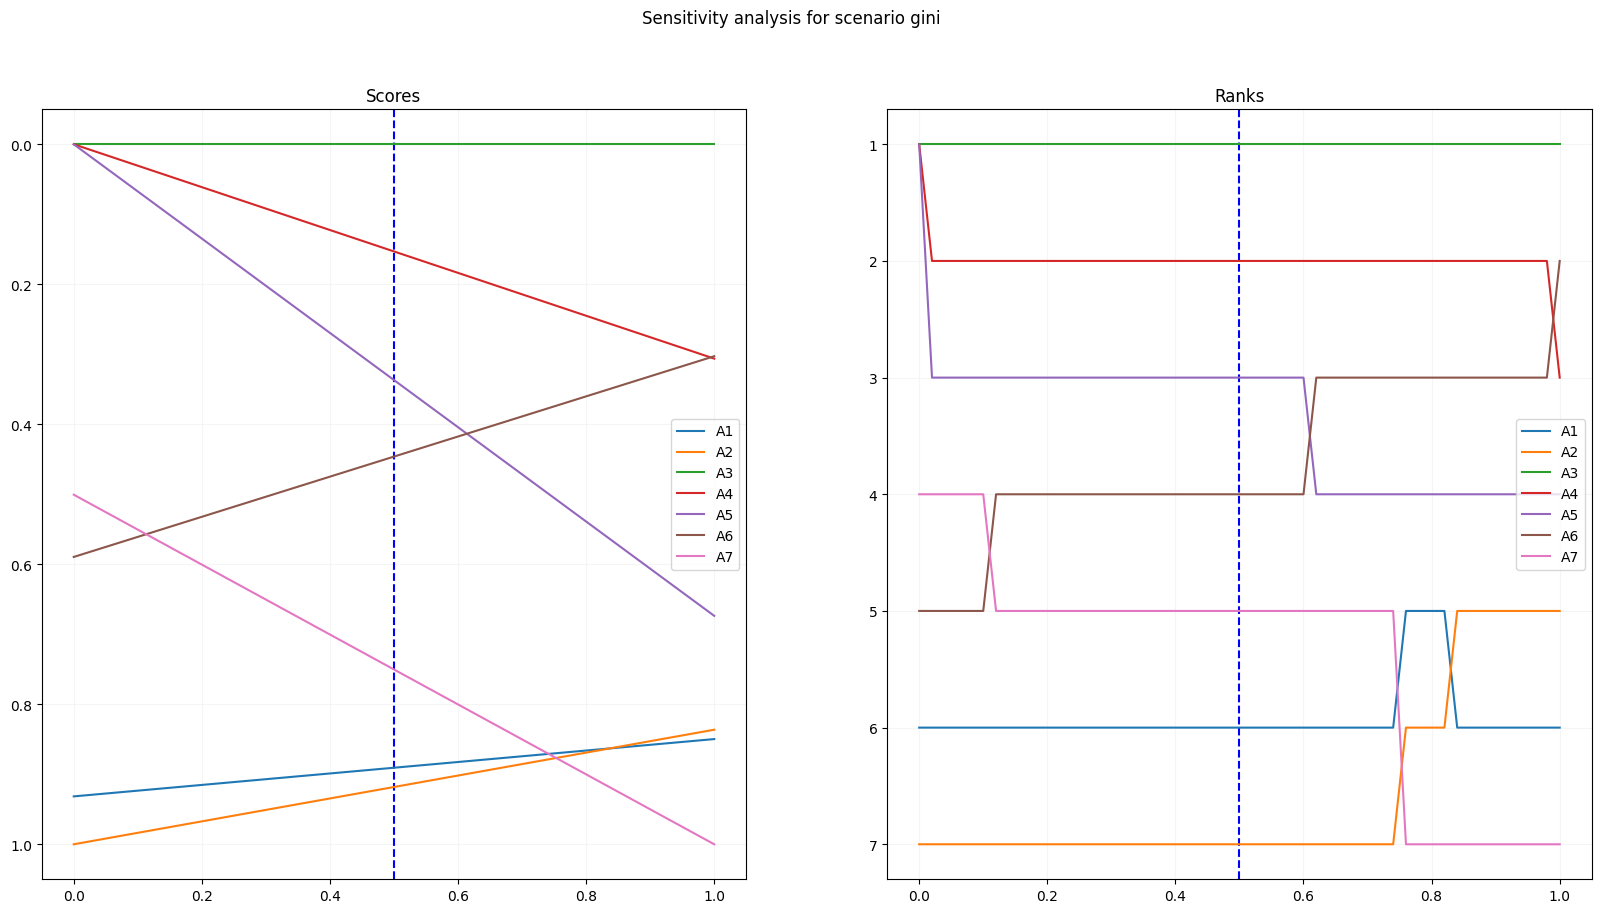

<Figure size 640x480 with 0 Axes>

In [12]:
experiment.sensitivity_analysis_v(path_template=None)

For each of the studied weights scenarios, two charts are available: sensitivity analysis for `Qi` values and for ranks. The blue dashed line on each chart represents the scores and ranks for the baseline scenario with `v=0.5`. Note, that the Y axis is inverted on the charts, so the best alternative is always plotted highest.

#### EQ scenario

The ranking obtained with the equal-weights scenario is very stable. Regardless of the value of `v`, the alternatives' ranks remain unchanged, unless the value is reduced to `0.0`. Then every alternative has the same score of 0.0333, so the solution is inconclusive. This is caused by **tutaj Jarek podpowie z tych metryk dlaczego; wyłaczamy jedna z R S i wychodzi jak wychodzi**.

In [15]:
tempdf = experiment.comparisons_v['eq'].to_dataframe()
tempdf[tempdf['evaluator'] == 'v_0.0']

,decision_problem,weights_set,evaluator,A1,A2,A3,A4,A5,A6,A7
0,wfarms,eq,v_0.0,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333


#### ENT scenario

The ranking obtained with the weights generated objectively using entropy weighting method is also very stable. Alternative A6 is always indicated as the best one, and A5 as the worst one. Again, this changes exclusively in the `v=0.0` scenario, but this time the alternative A6 remains indicated as the best one, yet the others are scored exactly 1.0000.

In [27]:
tempdf = experiment.comparisons_v['ent'].to_dataframe()
tempdf

,decision_problem,weights_set,evaluator,A1,A2,A3,A4,A5,A6,A7
0,wfarms,ent,v_0.0,1.000000,1.000000,1.000000,1.000000,1.0,0.0,1.00000
1,wfarms,ent,v_0.02,0.996766,0.996563,0.988633,0.991427,1.0,0.0,0.99964
2,wfarms,ent,v_0.04,0.993532,0.993126,0.977265,0.982854,1.0,0.0,0.99928
3,wfarms,ent,v_0.06,0.990297,0.989689,0.965898,0.974280,1.0,0.0,0.99892
4,wfarms,ent,v_0.08,0.987063,0.986252,0.954531,0.965707,1.0,0.0,0.99856
5,wfarms,ent,v_0.1,0.983829,0.982815,0.943164,0.957134,1.0,0.0,0.99820
6,wfarms,ent,v_0.12,0.980595,0.979378,0.931796,0.948561,1.0,0.0,0.99784
7,wfarms,ent,v_0.14,0.977360,0.975941,0.920429,0.939988,1.0,0.0,0.99748
8,wfarms,ent,v_0.16,0.974126,0.972504,0.909062,0.931415,1.0,0.0,0.99712
9,wfarms,ent,v_0.18,0.970892,0.969067,0.897694,0.922841,1.0,0.0,0.99676


#### Gini scenario

While the charts produced by sensitivity analysis for EQ and ENT scenarios were quite similar and very stable, the outcome of Gini scenario sensitivity analysis is quite different. From the first glimpse, it is clearly visible that the obtained solution is more compromise than the previous ones. Depending on the value of `v`, the scores of each alternative change with different direction and speed. Whilst the alternative A3 remains the best regardless of the `v` value, if `v` is increased to change the VIKOR methods balance towards veto, alternatives A4, A5, A6 get worse resuls (higher Qi values) and alternatives A6, A1 and A2 get better results (lower Qi values).

In case the `v` values is set to 0, A3, A4 and A5 are 

In [28]:
tempdf = experiment.comparisons_v['gini'].to_dataframe()
tempdf

,decision_problem,weights_set,evaluator,A1,A2,A3,A4,A5,A6,A7
0,wfarms,gini,v_0.0,0.931588,1.000000,0.0,0.000000,0.000000,0.589529,0.500594
1,wfarms,gini,v_0.02,0.929951,0.996727,0.0,0.006124,0.013473,0.583794,0.510582
2,wfarms,gini,v_0.04,0.928313,0.993453,0.0,0.012248,0.026947,0.578059,0.520570
3,wfarms,gini,v_0.06,0.926675,0.990180,0.0,0.018372,0.040420,0.572323,0.530558
4,wfarms,gini,v_0.08,0.925038,0.986907,0.0,0.024497,0.053894,0.566588,0.540546
5,wfarms,gini,v_0.1,0.923400,0.983633,0.0,0.030621,0.067367,0.560853,0.550534
6,wfarms,gini,v_0.12,0.921763,0.980360,0.0,0.036745,0.080841,0.555118,0.560522
7,wfarms,gini,v_0.14,0.920125,0.977087,0.0,0.042869,0.094314,0.549382,0.570511
8,wfarms,gini,v_0.16,0.918487,0.973813,0.0,0.048993,0.107788,0.543647,0.580499
9,wfarms,gini,v_0.18,0.916850,0.970540,0.0,0.055117,0.121261,0.537912,0.590487


In [13]:


# experiment.draw_v_weights_plots()
# experiment.csv_v_weights()
# experiment.heatmap_v_correlations() #todo sprawdzic dlaczego w EQ jest bialo
# experiment.sensitivity_analysis_v()

# experiment.draw_weights_sensitivity_plots()
# experiment.heatmap_weights_correlations()
# experiment.draw_weights_scores()

# experiment.draw_ahp_weights_plots()
# experiment.csv_ahp_weights()
# experiment.heatmap_ahp_correlations()
# experiment.draw_ahp_results()